
# Project: No-show appointments Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>In this project i will be analyzing data associated with 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

## Question
>What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [54]:
# load csv file
df = pd.read_csv('./noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [55]:
df.shape

(110527, 14)

In [56]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### Data Cleaning
 >I found that the data type of PatientId is float64, so i change it to int64, the type of AppointmentDay is String, so i convert it to datatime. 
 >

In [58]:
# convert type of feature 'AppointmentDay' and 'ScheduledDay' to type of datatime 
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
# convert type of feature 'PatientId' to type of int64
df['PatientId'] = df['PatientId'].astype(np.int64)

In [70]:
# drop outliers which Age <= 0
df.drop(df[df['Age'] <= 0].index, inplace=True)
# drop outliers which ScheduledDay < AppointmentDay
df.drop(df[df.ScheduledDay > df.AppointmentDay].index, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63165 entries, 5 to 110526
Data columns (total 14 columns):
PatientId         63165 non-null int64
AppointmentID     63165 non-null int64
Gender            63165 non-null object
ScheduledDay      63165 non-null datetime64[ns]
AppointmentDay    63165 non-null datetime64[ns]
Age               63165 non-null int64
Neighbourhood     63165 non-null object
Scholarship       63165 non-null int64
Hipertension      63165 non-null int64
Diabetes          63165 non-null int64
Alcoholism        63165 non-null int64
Handcap           63165 non-null int64
SMSReceived       63165 non-null int64
NoShow            63165 non-null object
dtypes: datetime64[ns](2), int64(9), object(3)
memory usage: 7.2+ MB


> I found that some patients made appointment at the same time also at the same hospital. So i think these are duplicated date even though maybe they have different No-show value

In [71]:
# query duplicated data which is same patient, same appointment day, and also the same neighbourhood.
df[df.duplicated(subset=['PatientId', 'AppointmentDay', 'Neighbourhood'], keep=False)]['AppointmentID'].count()

0

In [72]:
# Drop duplicates.
df.drop_duplicates(subset=['PatientId', 'AppointmentDay', 'Neighbourhood'], keep=False, inplace=True)

In [73]:
# Rename column No-show to NoShow and SMS_received to SMSReceived for easier operation following up
df.rename(index=str, columns={'No-show': 'NoShow', 'SMS_received': 'SMSReceived'}, inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 63165 entries, 5 to 110526
Data columns (total 14 columns):
PatientId         63165 non-null int64
AppointmentID     63165 non-null int64
Gender            63165 non-null object
ScheduledDay      63165 non-null datetime64[ns]
AppointmentDay    63165 non-null datetime64[ns]
Age               63165 non-null int64
Neighbourhood     63165 non-null object
Scholarship       63165 non-null int64
Hipertension      63165 non-null int64
Diabetes          63165 non-null int64
Alcoholism        63165 non-null int64
Handcap           63165 non-null int64
SMSReceived       63165 non-null int64
NoShow            63165 non-null object
dtypes: datetime64[ns](2), int64(9), object(3)
memory usage: 7.2+ MB


<a id='eda'></a>
## Exploratory Data Analysis

In [63]:
# Create masks for easier graping rows in the future
show = df.NoShow == 'No'
noShow = df.NoShow == 'Yes'

### Research Question 1 : To see if show up is related to SMS_received


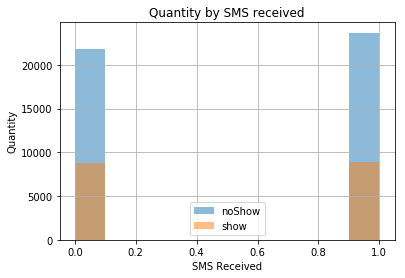

In [88]:
df.SMSReceived[show].hist(alpha=0.5, label='noShow')
df.SMSReceived[noShow].hist(alpha=0.5, label='show')
plt.xlabel('SMS Received')
plt.ylabel('Quantity')
plt.title('Quantity by SMS received')
plt.legend();

### observations
> From the histgram plot, you could see quantity of showup and noshow patients who received SMS is not much different, also quantity of showup and noshow patiends who didn't receive SMS is not much different too, so i think show up is not related to SMS_received

### Research Question 2 : To see if show up is related to Age.

In [118]:
# get counts for each status of showup and gender
gender_counts = df.groupby(['Gender', 'NoShow']).count()['AppointmentID']
gender_counts

Gender  NoShow
F       No        30686
        Yes       11965
M       No        14746
        Yes        5768
Name: AppointmentID, dtype: int64

In [119]:
# get total counts for each gender
gender_totals = df.groupby('Gender').count()['AppointmentID']
gender_totals

Gender
F    42651
M    20514
Name: AppointmentID, dtype: int64

In [120]:
# get proportions by dividing showup counts of Female by total # of Female 
female_proportions = gender_counts['F']/gender_totals['F']
female_proportions

NoShow
No     0.719467
Yes    0.280533
Name: AppointmentID, dtype: float64

In [121]:
# get proportions by dividing showup counts of Male by total # of Male
male_proportions = gender_counts['M']/gender_totals['M']
male_proportions

NoShow
No     0.718826
Yes    0.281174
Name: AppointmentID, dtype: float64

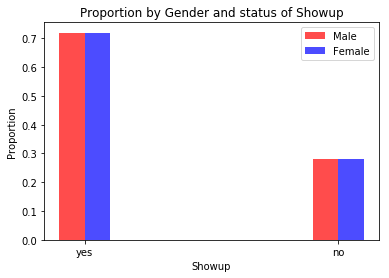

In [122]:
# the x locations for the groups
ind = np.arange(len(male_proportions))
# the width of the bars
width = 0.1

# plot bars
male_bars = plt.bar(ind, male_proportions, width, color='r', alpha=.7, label='Male')
female_bars = plt.bar(ind+width, female_proportions, width, color='b', alpha=.7, label='Female')

# title and labels
plt.ylabel('Proportion')
plt.xlabel('Showup')
plt.title('Proportion by Gender and status of Showup')
locations = ind + width / 2  # xtick locations
labels = ['yes', 'no']  # xtick labels
plt.xticks(locations, labels)

# legend
plt.legend()

### observations
> From the histgram plot, you could see proportion of Male and Female who attend the appointment is almost the same, and the proportion of Male and Female who didn't attend the appointment is almost the same too, so that seems Gender is not related to status of showup

### Research Question 3 :  To see if show up is related to Age

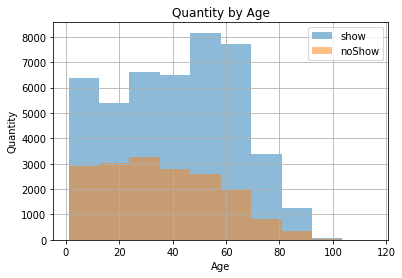

In [123]:
df.Age[show].hist(alpha=0.5, label='show')
df.Age[noShow].hist(alpha=0.5, label='noShow')

plt.xlabel('Age')
plt.ylabel('Quantity')
plt.title('Quantity by Age')
plt.legend();

### observations
> From the histgram plot, you could see patients who older than 45 will much more attend the appointment than who is younger than 45. So i think Showup is related to Age.

### Research Question 4 : To see if show up is related to Scholarship


In [129]:
# get counts for each status of showup and gender
scholarship_counts = df.groupby(['Scholarship', 'NoShow']).count()['AppointmentID']
scholarship_counts

Scholarship  NoShow
0            No        41544
             Yes       15661
1            No         3888
             Yes        2072
Name: AppointmentID, dtype: int64

In [130]:
# get total counts for each Scholarship
scholarship_totals = df.groupby('Scholarship').count()['AppointmentID']
scholarship_totals

Scholarship
0    57205
1     5960
Name: AppointmentID, dtype: int64

In [131]:
# get proportions by dividing showup counts of who having scholarship by total # of who having scholarship 
without_scholarship_proportions = scholarship_counts[0]/scholarship_totals[0]
without_scholarship_proportions

NoShow
No     0.72623
Yes    0.27377
Name: AppointmentID, dtype: float64

In [133]:
# get proportions by dividing showup counts of who without having scholarship by total # of who without having scholarship 
with_scholarship_proportions = scholarship_counts[1]/scholarship_totals[1]
with_scholarship_proportions

NoShow
No     0.652349
Yes    0.347651
Name: AppointmentID, dtype: float64

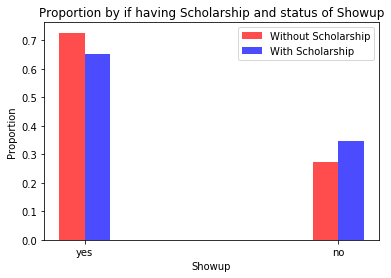

In [137]:
# the x locations for the groups
ind = np.arange(len(without_scholarship_proportions))
# the width of the bars
width = 0.1

# plot bars
without_scholarship_bars = plt.bar(ind, without_scholarship_proportions, width, color='r', alpha=.7, label='Without Scholarship')
with_scholarship_bars = plt.bar(ind+width, with_scholarship_proportions, width, color='b', alpha=.7, label='With Scholarship')

# title and labels
plt.ylabel('Proportion')
plt.xlabel('Showup')
plt.title('Proportion by if having Scholarship and status of Showup')
locations = ind + width / 2  # xtick locations
labels = ['yes', 'no']  # xtick labels
plt.xticks(locations, labels)

# legend
plt.legend()

### observations
> From the histgram plot, you could see the proportion of patients who attend the appointment almost the same for without scholarship and with scholarship. The proportion of patients who didn't attend the appointment almost the same for without scholarship and with scholarship too. So i think showup is not related to scholarship.

## Limitation
> I think the data is not sufficient enough. Challenge is i really don't have clear idea at the beginning.

<a id='conclusions'></a>
## Conclusions
I found that Age is important to predict if a patient will show up for their scheduled appointment, you will see who is older than approximate 43 will showup more.